<a href="https://colab.research.google.com/github/y2652liu/Get-My-Number-Game/blob/main/Team_Car_MSCI446.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This ipynb is the code for Team Car's Project for MSCI446
# Team Members: Maan Patel, Dana Lee, Yuanqin (Cici) Liu

# Table of Contents

### 1.   [**Part 1:** Data Cleaning](#part_1)
>1.1  [**Part 2.1:** Data Import](#part_1_1)

>1.2  [**Part 2.2:** Fixing Formatting](#part_1_2)

>1.3  [**Part 2.1:** Replacing Null values with mean](#part_1_3)

### 2.   [**Part 2:** Supervised Learning](#part_2)
>2.1  [**Part 2.1:** Price Model](#part_2_1)

>2.2  [**Part 2.2:** Sentiment Model](#part_2_2)

### 5.   [**Part 3:** Unsupervised Learning](#part_3)


<a name="part_1"></a>
# Part 1: Data Cleaning

<a name="part_1_1"></a>
## Data Import

In [ ]:
# Importing our libraries
from google.colab import files
import io
import pandas as pd
import numpy as np
import pandas as pd

In [ ]:
# Uploading our csv file for our car data found at: 
# https://docs.google.com/spreadsheets/d/1AMTZjTabTaRsXaGLdfSLO-g1IGj8-8Cjc2QbrJbRbK4/edit?usp=sharing
!wget "https://www.dropbox.com/s/d7d2rsrv1yxxyum/Cars_Data-MSCI446.csv?dl=0"

--2022-04-05 19:53:05--  https://www.dropbox.com/s/d7d2rsrv1yxxyum/Cars_Data-MSCI446.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d7d2rsrv1yxxyum/Cars_Data-MSCI446.csv [following]
--2022-04-05 19:53:05--  https://www.dropbox.com/s/raw/d7d2rsrv1yxxyum/Cars_Data-MSCI446.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00f51c58f4fc8be31d403c748a.dl.dropboxusercontent.com/cd/0/inline/Bi2pOmQpDNKeeNYFWN6LYrGl60gA0vMEsg4chKI6Fud1Vbxx0sIMH3_mMFNnLpDv_zGrCTgjv5WhUGU_uOaWPg1Z5V5vZkcpG9tbTjYqsI668meFopudFDeKThkHz422A6150y6oC8j6kWHwpMiu5OtzQ892-mhthSrozbYchWdPKg/file# [following]
--2022-04-05 19:53:05--  https://uc00f51c58f4fc8be31d403c748a.dl.dropboxusercontent.com/cd/0/inline/Bi2pOmQpDNKeeNYFWN6LYrGl60gA0vMEsg4c

In [ ]:
#creating our dataframes
# df = pd.read_csv(io.BytesIO(uploaded_cars_data['Cars_Data-MSCI446.csv']))
df = pd.read_csv('Cars_Data-MSCI446.csv?dl=0')
df.head()

,ID,Make,Model,Price,EPA Classification,Drivetrain,Engine Type and Required Fuel,Engine Size (liters),Engine Size (cubic inches),Fuel System,...,EPA Fuel Economy (highway (mpg)),Fuel Capacity / Gas Tank Size,Fuel Capacity Gas Tank Size,Wheelbase (inches),Length (inches),"Width, without mirrors (inches)",Height (inches),Passenger / Seating Capacity,Number of Seats,Trunk Space (cubic feet)
0,0,Acura,Ilx,"$34,245",Compact Cars,Front Wheel Drive,Premium Unleaded I-4,2.4,144.0,Gasoline Direct Injection,...,NaN,105.1,105.1,70.6,55.6,59.4,60.2,38.0,2,79.81115
1,1,Acura,Mdx,"$55,945",Small SUV 4WD,All Wheel Drive,Premium Unleaded V-6,3.5,212.0,Gasoline Direct Injection,...,NaN,NaN,NaN,18.5,196.2,113.8,198.4,NaN,5,38.10000
2,2,Acura,Nsx,"$171,495",Two Seaters,All Wheel Drive,Twin Turbo Gas/Electric V-6,3.5,213.0,Port/Direct Injection,...,NaN,NaN,NaN,178.5,76.3,47.8,65.5,54.7,2,4.40000
3,3,Acura,Rdx,"$45,995",Small SUV 4WD,All Wheel Drive,Intercooled Turbo Premium Unleaded I-4,2.0,122.0,Gasoline Direct Injection,...,28.0,NaN,NaN,17.1,186.7,108.3,187.4,5.7,5,38.00000
4,4,Acura,Rlx,"$55,925",Midsize Cars,Front Wheel Drive,Premium Unleaded V-6,3.5,212.0,Gasoline Direct Injection,...,29.0,18.5,18.5,112.2,198.1,74.4,57.7,5.0,5,14.90000


<a name="part_1_2"></a>
## Fixing Formatting

In [ ]:
# Starting with height
# Step 1: remove rows that contain a '/' in them. (only 3 rows)

height = df["Height (inches)"]

for i in range(len(height)):
  if type(height[i]) == str:
    if '/' in str(height[i]):
      df = df.drop(labels=i, axis=0)
    else:
      float(height[i])    

data_len = len(df)

#Step 2: convert the height column into float
height = df["Height (inches)"]
height = height.astype(float)
df["Height (inches)"] = height


# Step 3: Replace the null values of all the height values that are null with the 
# mean of height values
# Reason: The reason for this will be discussed in the report 


In [ ]:
# price = df["Price"]

# From Tutuorial 2 Data Exploration

df["Price"] = [x.replace('$','') for x in df['Price']] 

df["Price"] = [x.replace(',','') for x in df['Price']]
 
df["Price"] = pd.to_numeric(df["Price"])

In [ ]:
df["Maximum Torque"].fillna("0", inplace = True)
df["Maximum Torque"] = [x.replace(',','') for x in df["Maximum Torque"]]
df["Maximum Torque"] = df["Maximum Torque"].astype(float)

<a name="part_1_3"></a>
## Replace the null values with the mean value

In [ ]:
# See the number of null values that need to be dealth with
print(df.isnull().sum())

ID                                    0
Make                                  0
Model                                 0
Price                                 0
EPA Classification                    0
Drivetrain                           29
Engine Type and Required Fuel         3
Engine Size (liters)                 39
Engine Size (cubic inches)           57
Fuel System                          17
Maximum Torque                        0
Maximum Torque RPM                   68
Maximum Horsepower                   22
Maximum Horsepower RPM               36
Transmission Description              2
Number of Transmission Speeds         0
CO2 Emissions                        16
Mileage (Range)                     178
Mileage (city)                      219
Mileage (highway (miles))           252
EPA Fuel Economy, combined           66
EPA Fuel Economy (city)              11
EPA Fuel Economy (highway (mpg))     14
Fuel Capacity / Gas Tank Size       108
Fuel Capacity Gas Tank Size         108


In [ ]:
# Find the mean of the height, and round it to two decimal places
height_mean = height.mean()
height_mean = round(height_mean, 2)
print("The mean of Height is: ", height_mean)

# Replace the null values with the mean of Height
df["Height (inches)"].fillna(height_mean, inplace = True)

The mean of Height is:  65.29


In [ ]:
# Find the mean of the length, and round it to two decimal places
length = df["Length (inches)"]
length_mean = length.mean()
length_mean = round(length_mean, 2)
#print("The mean of Length is: ", length_mean)

# Replace the null values with the mean of length
df["Length (inches)"].fillna(length_mean, inplace = True)

In [ ]:
# Find the mean of the Engine Size (liters), and round it to two decimal places
engine_size = df["Engine Size (liters)"]
engine_size = engine_size.mean()
engine_size = round(engine_size, 2)
#print("The mean of Height is: ", engine_size)

# Replace the null values with the mean of Engine Size (liters)
df["Engine Size (liters)"].fillna(engine_size, inplace = True)

In [ ]:
# Find the mean of the Engine Size (cubic inches), and round it to two decimal places
engine_size = df["Engine Size (cubic inches)"]
engine_size_mean = engine_size.mean()
engine_size_mean = round(engine_size_mean, 2)
#print("The mean of Height is: ", engine_size_mean)

# Replace the null values with the mean of Engine Size (cubic inches)
df["Engine Size (cubic inches)"].fillna(engine_size_mean, inplace = True)

In [ ]:
# Find the mean of the Maximum Horsepower, and round it to two decimal places
hp = df["Maximum Horsepower"]
hp_mean = hp.mean()
hp_mean = round(hp_mean, 2)
#print("The mean of Height is: ", hp_mean)

# Replace the null values with the mean of Maximum Horsepower
df["Maximum Horsepower"].fillna(hp_mean, inplace = True)

In [ ]:
# Find the mean of the EPA Fuel Economy (city), and round it to two decimal places

FuelEconomyCity = df["EPA Fuel Economy (city)"]
FuelEconomyCity_mean = FuelEconomyCity.mean()
FuelEconomyCity_mean = round(FuelEconomyCity_mean, 2)
#print("The mean of EPA Fuel Economy (city) is: ", FuelEconomyCity_mean)

# Replace the null values with the EPA Fuel Economy (city)
df["EPA Fuel Economy (city)"].fillna(FuelEconomyCity_mean, inplace = True)

In [ ]:
# Find the mean of the EPA Fuel Economy (highway (mpg)), and round it to two decimal places 

FuelEconomyHighway = df["EPA Fuel Economy (highway (mpg))"]
FuelEconomyHighway_mean = FuelEconomyHighway.mean()
FuelEconomyHighway_mean = round(FuelEconomyHighway_mean, 2)
#print("The mean of EPA Fuel Economy (highway (mpg)) is: ", FuelEconomyHighway_mean)

# Replace the null values with the EPA Fuel Economy (highway (mpg))
df["EPA Fuel Economy (highway (mpg))"].fillna(FuelEconomyHighway_mean, inplace = True)

In [ ]:
# Find the mean of the Passenger / Seating Capacity, and round it to two decimal places  

PassengerCapacity = df["Passenger / Seating Capacity"]
PassengerCapacity_mean = PassengerCapacity.mean()
PassengerCapacity_mean = round(PassengerCapacity_mean, 2)
#print("The mean of Passenger / Seating Capacity is: ", PassengerCapacity_mean)

# Replace the null values with the Passenger / Seating Capacity 
df["Passenger / Seating Capacity"].fillna(PassengerCapacity_mean, inplace = True)

In [ ]:
# Find the mean of the Width, without mirrors (inches), and round it to two decimal places   

Width = df["Width, without mirrors (inches)"]
Width_mean = Width.mean()
Width_mean = round(Width_mean, 2)
#print("The mean of Width, without mirrors (inches) is: ", Width_mean)

# Replace the null values with the Width, without mirrors (inches)
df["Width, without mirrors (inches)"].fillna(Width_mean, inplace = True)

In [ ]:
# Find the mean of the Number of Seats, and round it to two decimal places

Numberofseat = df["Number of Seats"]
Numberofseat_mean = Numberofseat.mean()
Numberofseat_mean = round(Numberofseat_mean, 2)
#print("The mean of Number of Seats is: ", Numberofseat_mean)

# Replace the null values with the Number of Seats 
df["Number of Seats"].fillna(Numberofseat_mean, inplace = True)

In [ ]:
# Find the mean of the Fuel Capacity Gas Tank Size, and round it to two decimal places

Gastanksize = df["Fuel Capacity Gas Tank Size"]
Gastanksize_mean = Gastanksize.mean()
Gastanksize_mean = round(Gastanksize_mean, 2)
#print("The mean of Fuel Capacity Gas Tank Size is: ", Gastanksize_mean)

# Replace the null values with the Fuel Capacity Gas Tank Size
df["Fuel Capacity Gas Tank Size"].fillna(Gastanksize_mean, inplace = True)

In [ ]:
# Find the mean of the Trunk Space (cubic feet), and round it to two decimal places

Trunkspace = df["Trunk Space (cubic feet)"]
Trunkspace_mean = Trunkspace.mean()
Trunkspace_mean = round(Trunkspace_mean, 2)
#print("The mean of Trunk Space (cubic feet) is: ", Trunkspace_mean)

# Replace the null values with the Trunk Space (cubic feet)
df["Trunk Space (cubic feet)"].fillna(Trunkspace_mean, inplace = True)

In [ ]:
# Find the mean of the Maximum Torque RPM , and round it to two decimal places

torque_rpm = df["Maximum Torque RPM"]
torque_rpm_mean = torque_rpm.mean()
torque_rpm_mean = round(torque_rpm_mean, 2)
#print("The mean of Trunk Space (cubic feet) is: ", Trunkspace_mean)

# Replace the null values with the Maximum Torque RPM
df["Maximum Torque RPM"].fillna(torque_rpm_mean, inplace = True)

In [ ]:
# Find the mean of the CO2 Emissions, and round it to two decimal places

c02_emission = df["CO2 Emissions"]
c02_emission_mean = c02_emission.mean()
c02_emission_mean = round(c02_emission_mean, 2)
#print("The mean of Trunk Space (cubic feet) is: ", Trunkspace_mean)

# Replace the null values with the CO2 Emissions
df["CO2 Emissions"].fillna(c02_emission_mean, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                346 non-null    int64  
 1   Make                              346 non-null    object 
 2   Model                             346 non-null    object 
 3   Price                             346 non-null    float64
 4   EPA Classification                346 non-null    object 
 5   Drivetrain                        317 non-null    object 
 6   Engine Type and Required Fuel     343 non-null    object 
 7   Engine Size (liters)              346 non-null    float64
 8   Engine Size (cubic inches)        346 non-null    float64
 9   Fuel System                       329 non-null    object 
 10  Maximum Torque                    346 non-null    float64
 11  Maximum Torque RPM                346 non-null    float64
 12  Maximum 

In [ ]:
# Drop due to too many null values. 
df.drop("Mileage (Range)", axis=1, inplace=True)
df.drop("Mileage (city)", axis=1, inplace=True)
df.drop("Mileage (highway (miles))", axis=1, inplace=True)

In [ ]:
# Find the mean of the EPA Fuel Economy, combined, and round it to two decimal places

fuel_company = df["EPA Fuel Economy, combined"]
fuel_company_mean = fuel_company.mean()
fuel_company_mean = round(fuel_company_mean, 2)
#print("The mean of Trunk Space (cubic feet) is: ", Trunkspace_mean)

# Replace the null values with the  EPA Fuel Economy
df["EPA Fuel Economy, combined"].fillna(fuel_company_mean, inplace = True)

In [ ]:
# Find the mean of the Fuel Capacity / Gas Tank Size, combined, and round it to two decimal places

fuel_capacity = df["Fuel Capacity / Gas Tank Size"]
fuel_capacity_mean = fuel_capacity.mean()
fuel_capacity_mean = round(fuel_capacity_mean, 2)
#print("The mean of Trunk Space (cubic feet) is: ", Trunkspace_mean)

# Replace the null values with the Fuel Capacity / Gas Tank Size
df["Fuel Capacity / Gas Tank Size"].fillna(fuel_capacity_mean, inplace = True)

In [ ]:
# Find the mean of the Wheelbase (inches), combined, and round it to two decimal places

wheelbase= df["Wheelbase (inches)"]
wheelbase_mean = wheelbase.mean()
wheelbase_mean = round(wheelbase_mean, 2)
#print("The mean of Trunk Space (cubic feet) is: ", Trunkspace_mean)

# Replace the null values with the Wheelbase (inches) 
df["Wheelbase (inches)"].fillna(wheelbase_mean, inplace = True)

In [ ]:
print(df.isnull().sum())

ID                                   0
Make                                 0
Model                                0
Price                                0
EPA Classification                   0
Drivetrain                          29
Engine Type and Required Fuel        3
Engine Size (liters)                 0
Engine Size (cubic inches)           0
Fuel System                         17
Maximum Torque                       0
Maximum Torque RPM                   0
Maximum Horsepower                   0
Maximum Horsepower RPM              36
Transmission Description             2
Number of Transmission Speeds        0
CO2 Emissions                        0
EPA Fuel Economy, combined           0
EPA Fuel Economy (city)              0
EPA Fuel Economy (highway (mpg))     0
Fuel Capacity / Gas Tank Size        0
Fuel Capacity Gas Tank Size          0
Wheelbase (inches)                   0
Length (inches)                      0
Width, without mirrors (inches)      0
Height (inches)          

In [ ]:
# Step 1: Replace the null values of all the Engine Size values that are null with the 
# mean of Engine Size values
# The reason for this will be discussed in the report 

# Find the mean of the Engine Size, and round it to two decimal places
engine_size = df["Engine Size (liters)"]
engine_size = engine_size.mean()
engine_size = round(engine_size, 2)
print("The mean of Height is: ", engine_size)

# Replace the null values with the mean of Height
df["Engine Size (liters)"].fillna(engine_size, inplace = True)

The mean of Height is:  2.89


In [ ]:
df["Engine Size (liters)"]

0      2.40
1      3.50
2      3.50
3      2.00
4      3.50
       ... 
341    2.00
342    2.00
343    2.89
344    2.00
345    2.00
Name: Engine Size (liters), Length: 346, dtype: float64

In [ ]:
engine_size = df["Engine Size (cubic inches)"]
engine_size_mean = engine_size.mean()
engine_size_mean = round(engine_size_mean, 2)
print("The mean of Height is: ", engine_size_mean)

# Replace the null values with the mean of Height
df["Engine Size (cubic inches)"].fillna(engine_size_mean, inplace = True)

The mean of Height is:  174.52


In [ ]:
hp = df["Maximum Horsepower"]
hp_mean = hp.mean()
hp_mean = round(hp_mean, 2)
print("The mean of Height is: ", hp_mean)

# Replace the null values with the mean of Height
df["Maximum Horsepower"].fillna(hp_mean, inplace = True)

The mean of Height is:  296.93


In [ ]:
print(df.isnull().sum())
print(df)
print(df['Maximum Horsepower'])

ID                                   0
Make                                 0
Model                                0
Price                                0
EPA Classification                   0
Drivetrain                          29
Engine Type and Required Fuel        3
Engine Size (liters)                 0
Engine Size (cubic inches)           0
Fuel System                         17
Maximum Torque                       0
Maximum Torque RPM                   0
Maximum Horsepower                   0
Maximum Horsepower RPM              36
Transmission Description             2
Number of Transmission Speeds        0
CO2 Emissions                        0
EPA Fuel Economy, combined           0
EPA Fuel Economy (city)              0
EPA Fuel Economy (highway (mpg))     0
Fuel Capacity / Gas Tank Size        0
Fuel Capacity Gas Tank Size          0
Wheelbase (inches)                   0
Length (inches)                      0
Width, without mirrors (inches)      0
Height (inches)          

<a name="part_2"></a>
# Part 2: Supervised Learning


Supervised learning is providing the machine with labelled data, and instructions on how to find patterns!

This section will comprise of two models. A price prediciton model using linear regression, and a sentiment prediction model using multinomial 
logistic regression and text mining (NLP). 

<a name="part_2_1"></a>
## Part 2.1: Price Prediction model

### Exploring/Visualizing the Data

In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
# Extract columns which are needed for linear regression, and save to df_new_lin.
df_copy = df.copy()
print(df_copy.isnull().sum())
df_new_lin = df_copy[["Maximum Horsepower","Maximum Torque",
                      "Number of Transmission Speeds", "EPA Fuel Economy (city)",
                      "EPA Fuel Economy, combined", "EPA Fuel Economy (city)",
                      "EPA Fuel Economy (highway (mpg))", "Fuel Capacity / Gas Tank Size",
                      "Wheelbase (inches)", "Length (inches)", "Width, without mirrors (inches)",
                      "Height (inches)", "Number of Seats", "Price"]]

ID                                   0
Make                                 0
Model                                0
Price                                0
EPA Classification                   0
Drivetrain                          29
Engine Type and Required Fuel        3
Engine Size (liters)                 0
Engine Size (cubic inches)           0
Fuel System                         17
Maximum Torque                       0
Maximum Torque RPM                   0
Maximum Horsepower                   0
Maximum Horsepower RPM              36
Transmission Description             2
Number of Transmission Speeds        0
CO2 Emissions                        0
EPA Fuel Economy, combined           0
EPA Fuel Economy (city)              0
EPA Fuel Economy (highway (mpg))     0
Fuel Capacity / Gas Tank Size        0
Fuel Capacity Gas Tank Size          0
Wheelbase (inches)                   0
Length (inches)                      0
Width, without mirrors (inches)      0
Height (inches)          

In [ ]:
# Describe the dataset.
df_new_lin.Price.describe()

count       346.000000
mean      66069.257225
std       72900.386632
min       16465.000000
25%       31791.250000
50%       44195.000000
75%       63108.750000
max      525465.000000
Name: Price, dtype: float64

It seems that there are 346 total prices of cars with a mean of 66k. The lowest price of a car is around 16K, and highest is around 525K.

To learn more about the prices, a histogram is shown below: 

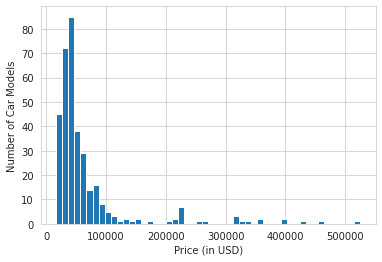

In [ ]:
# Histogram of prices (this is the target of our dataset)， bins is for more detail.

plt.hist(df_new_lin.Price,bins=50)
plt.xlabel('Price (in USD)')
plt.ylabel('Number of Car Models')
plt.show()

The graph is a right-skewed histogram. Most cars models are distriobuted under 60,000 dollars. 40,000 - 50,000 has most number of cars. This make sense in reality where most cars are for transportation purposes, where there are also luxury products that are very expensive.

Let's compare how one of the variables compares to price:

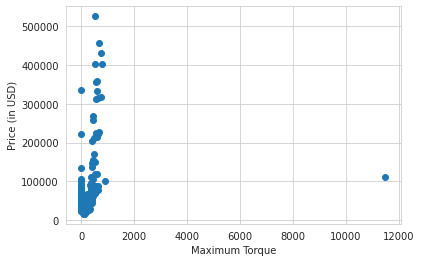

In [ ]:
# Torque compared to Price
plt.scatter(df["Maximum Torque"], df["Price"])
plt.ylabel('Price (in USD)')
plt.xlabel("Maximum Torque")
plt.show()

In [ ]:
# The outlier seems to affect our graph. Let us remove this outlier. 
one = [x for x in df_new_lin["Maximum Torque"] if x > 10000]
torque = df_new_lin["Maximum Torque"]

for i in range(len(torque)):
  if torque[i] > 10000:
    df_new_lin = df_new_lin.drop(labels = i, axis = 0)

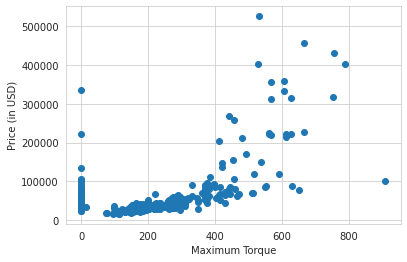

In [ ]:
# Re-plot with the outlier removed
plt.scatter(df_new_lin["Maximum Torque"], df_new_lin["Price"])
plt.ylabel('Price (in USD)')
plt.xlabel("Maximum Torque")
plt.show()

#The relationship appears to be quadratic. 

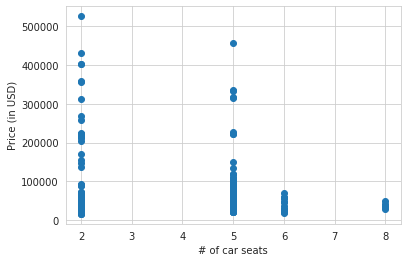

In [ ]:
# Another example: Price compared to Number of seats
plt.scatter(df_new_lin["Number of Seats"], df_new_lin["Price"])
plt.ylabel('Price (in USD)')
plt.xlabel("# of car seats")
plt.show()

# It seems to be distributed flatly with several outliers. 

Let us see how our features react to a linear fit for the Price:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


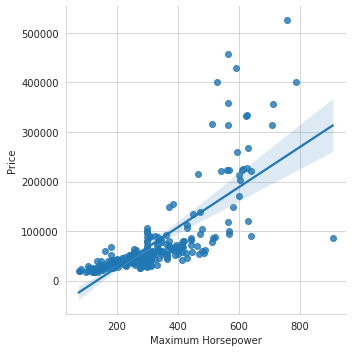

In [ ]:
# Using Seaborn to create a linear fit
sns.lmplot('Maximum Horsepower','Price',df_new_lin)

### Linear Regression

It is time to build the model with 13 explanary variables included in the project proposal:

In [ ]:
# Extract columns which are needed for linear regression, and save to df_new_lin

df_copy = df.copy()
df_new_lin = df_copy[["Maximum Horsepower","Maximum Torque", "Number of Transmission Speeds", "EPA Fuel Economy (city)", "EPA Fuel Economy, combined", "EPA Fuel Economy (city)", "EPA Fuel Economy (highway (mpg))", "Fuel Capacity / Gas Tank Size", "Wheelbase (inches)", "Length (inches)", "Width, without mirrors (inches)", "Height (inches)", "Number of Seats","Price"]]

# Our target variables is Price, and all the rest numeric variables are the features

# Features
X = df_new_lin.drop(columns=['Price'],axis=1) 

# Target
Y = df_new_lin[['Price']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# TODO:random_state 
# split dataset for training and testing (testing size = orginal size * 20%, rate of randomness of spliting)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# data normalization 
scaler=preprocessing.MinMaxScaler().fit(X1_train)
X1_train=scaler.transform(X1_train)
X1_test=scaler.transform(X1_test)

#fit the training set
regr = LinearRegression()
regr.fit(X1_train, Y1_train)

LinearRegression()

In [ ]:
#show coefficient
coeff_df = pd.DataFrame(df_new_lin.columns)
coeff_df.columns = ["Features"]

#print(regr.coef_)
coeff_df["Estimate of Coefficients W.R.T. Price"] = pd.Series(regr.coef_[0])

coeff_df
# Results, nonlinear relationship

,Features,Estimate of Coefficients W.R.T. Price
0,Maximum Horsepower,323871.200596
1,Maximum Torque,95598.549276
2,Number of Transmission Speeds,-2722.792495
3,EPA Fuel Economy (city),88601.723306
4,"EPA Fuel Economy, combined",-841.980041
5,EPA Fuel Economy (city),88601.723306
6,EPA Fuel Economy (highway (mpg)),-221820.265392
7,Fuel Capacity / Gas Tank Size,69198.781351
8,Wheelbase (inches),2172.737943
9,Length (inches),16409.960709


### Evaluating the Linear Regression Model

R2 score: -0.5199048291136572
mean squared error 911820050.6640855
70


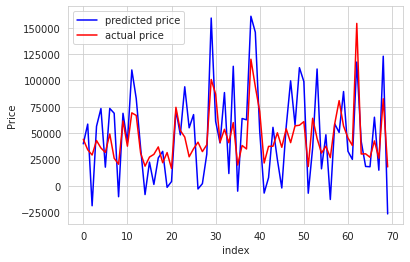

In [ ]:
#use the testing features to predit the price
Y1_pred = regr.predict(X1_test)

#compare the prediction with referenced price
print('R2 score:', r2_score(Y1_test, Y1_pred))

#mean square error
print('mean squared error', mean_squared_error(Y1_test, Y1_pred))

#70 prices for prediction:
print(len(Y1_pred))
#set index as 70
idx = np.arange(0,70)  

plt.plot(idx, Y1_pred, color='b',label='predicted price')
plt.plot(idx, Y1_test, color='r',label='actual price')
plt.xlabel('index')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

With a R2 score that is very far from 1.0, and a huge mean square error, the model is most-likely **non-linear**. As shown in the graph, with the large difference between predicted and actual prices, we could not use this model to pridict price.

Dataset is correct, then why model is non-linear? Is our model really not linear? Use another model (KNeighbors) to prove it:

In [ ]:
# dataset is correct, then why model is non-linear?
from operator import ne
from sklearn import neighbors

#build neigh model
#x_train, y_train -> neigh training
#get a smart neigh

#x_test -> neigh -> Y1_pred
#compare(Y1_pred, Y1_test)
#get the error and score
neigh=neighbors.KNeighborsRegressor(n_neighbors=7)
neigh.fit(X1_train, Y1_train)
Y1_pred=neigh.predict(X1_test)

#compare the prediction with referenced price
print('R2 score KNeighbors:', r2_score(Y1_test, Y1_pred))

#mean square error
print('mean squared error KNeighbors', mean_squared_error(Y1_test, Y1_pred))

# As K neighborhood has a better score than the linear regresdsion model, it proves that this model is not linear.

R2 score KNeighbors: 0.5533473425175793
mean squared error KNeighbors 267955493.64256555


R2 score comparison: 

**KNeighbors** = 0.5533473425175793 > **linearRegression** = -0.5199048291136572

Mean squared error: 

**KNeighbors** = 267955493.64256555 < **linearRegression** = 911820050.6640855

As the dataset gets better score/more accurate (closer to 1.0) and less error using KNeighbors than linearRegression, the dataset is more likely to fit KNeighbor instead of LinearRegression. Therefore, it is non-linear and the linear regression model is wrong.

Then is every feature in the model non-linear with price? Let's find correlation between all explanatory variables:

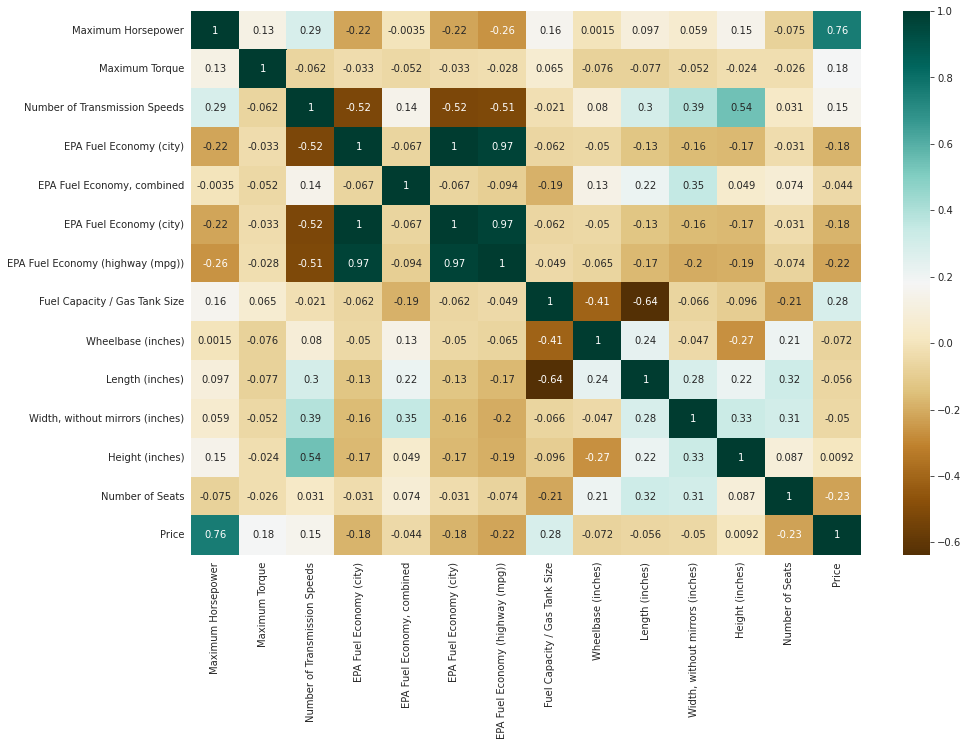

In [ ]:
# Let us visualize the correlation between all the explanatory variables declared
# in the report

plt.figure(figsize=(15,10))
c= df_new_lin.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Seems like the only Maximum Horsepower has a high correlation (0.76) to Maximum Horsepower.

The results of our linear regression model make sense now. Among 13 features, only Maximum Horsepower one is linear which makes our model wrong.

Even though the model could not be used to predict price, the horsepower v.s. price relationship should be linear. To explore more about it:

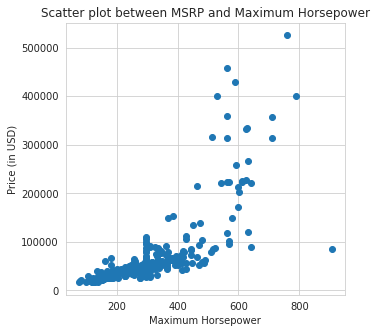

In [ ]:
# Let us visualize this. 
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_new_lin['Maximum Horsepower'], df_new_lin['Price'])
plt.title('Scatter plot between MSRP and Maximum Horsepower')
ax.set_xlabel('Maximum Horsepower')
ax.set_ylabel('Price (in USD)')
plt.show()

The graph seems to follow a **quadratic pattern**. The linear characteristic reflects horsepower's correlation with price.

This is getting intersting. Let's **build two other models** for horsepower v.s. price: one is linear, one adds its quadratic charactistic:

In [ ]:
# To explore horsepower's relationship with price
# data preprocessing 

# Price = k * horsepower
df_horsepower = df_copy[['Maximum Horsepower', 'Price']]

df_horsepower['Maximum Horsepower**2'] = df_horsepower['Maximum Horsepower']**2
X1 = df_horsepower[['Maximum Horsepower']]
Y1 = df_horsepower[['Price']]
#print(df_horsepower)

# Price = k_1 * horsepower + k_2 * (horsepower**2)
df_horsepower['Maximum Horsepower**2'] = df_horsepower['Maximum Horsepower']**2
X2 = df_horsepower[['Maximum Horsepower', 'Maximum Horsepower**2']]
Y2 = df_horsepower[['Price']]


# split dataset for training and testing (testing size = orginal size * 20%, rate of randomness of spliting)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=0)

# data normalization 
scaler=preprocessing.MinMaxScaler().fit(X1_train)
X1_train=scaler.transform(X1_train)
X1_test=scaler.transform(X1_test)

scaler=preprocessing.MinMaxScaler().fit(X2_train)
X2_train=scaler.transform(X2_train)
X2_test=scaler.transform(X2_test)


# Price = k * horsepower
#build &fit
regr = LinearRegression()
regr.fit(X1_train, Y1_train)
#use the testing features to predit the price
Y1_pred = regr.predict(X1_test)
#compare the prediction with referenced price
print('R2 score linear:', r2_score(Y1_test, Y1_pred))
# mean square
print("mean square linear:", mean_squared_error(Y1_test, Y1_pred))

# Price = k_1 * horsepower + k_2 * (horsepower**2)
#build &fit
regr = LinearRegression()
regr.fit(X2_train, Y2_train)
#use the testing features to predit the price
Y2_pred = regr.predict(X2_test)
#compare the prediction with referenced price
print('R2 score quadratic:', r2_score(Y2_test, Y2_pred))
# mean square
print("mean square quadratic:", mean_squared_error(Y2_test, Y2_pred))

R2 score linear: 0.29669429201727415
mean square linear: 1697554251.2289898
R2 score quadratic: 0.44417654459952227
mean square quadratic: 1341579428.3174543


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


R2 score comparison: 


**quadratic** = 0.4442 **> linear** = 0.2967 **> 13 feature linear model** = -0.5199


Both of the horsepower v.s. price models performs better than the first model that considers 13 feature linear model as expected.

Mean square comparison:

**quadratic** = 1341579428.3174543 **< linear** = 1697554251.2289898 

For horsepower and price, we added a quadratic term, the performance becomes better (more accurate) compared to its linear model. Therefore, it proves horsepower's quadratic relationship with price even though the scores are not perfect.

To visualize how the data fits quadratic better:

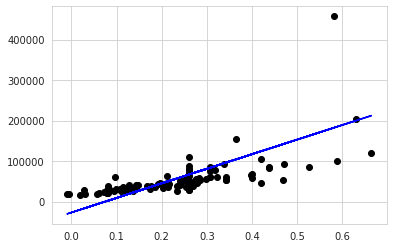

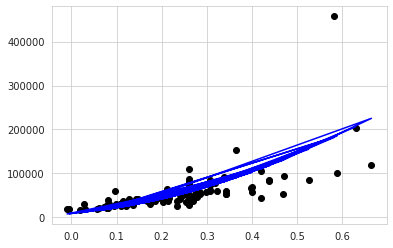

In [ ]:
# Compare linear & quadratic
plt.scatter(X1_test, Y1_test, color='black')
plt.plot(X1_test, Y1_pred, color='blue')
plt.show()

plt.scatter(X2_test[:,0], Y2_test, color='black')
plt.plot(X2_test[:,0], Y2_pred, color='blue')
plt.show()

Quadratic seems fit our dataset better.

**Conclusion**: 

The linear regression model described in the proposal is **non-linear**. Among the 13 features, only horsepower has a correlation with price (0.76). **Horsepower** is the most influencing feature by comparison (coefficient=323871) as the quadratic model has the best accuracy (less error and higher score) among the original linear regression model, KNeighbor, and Horsepower v.s. Price linear model. Therefore, because of the poor performance of the original linear regression model, it is an invalid model for prediction.

This should be firstly caused by the inaccurate data as the dataset is extracted from HTML using Beautifulsoup. Linear Regression usually only works on the pre-designed dataset, such as Kaggle. However, those are unpermitted to be used in this project. Secondly, the linear regression model is way too simple to solve such a complex problem. The world would be too simple if this problem could be modeled using linear regression. Prediction is very challenging in general. If such a business problem is solved, the model could even be sold to enterprises. 


Some possible solutions towards this could be removing the unrelated data, or using a more complex model (such as Decision Tree Regression and Random Forest) for prediction.


<a name="part_2_2"></a>
## Part 2.2: Sentiment Prediction model

### Data Import, Conversion, and Cleaning

In [ ]:
# We can manually upload these files OR simply use the dropbox link using !wget

# Dataset from https://archive.ics.uci.edu/ml/datasets/opinrank+review+dataset

# uploaded_cars_sentiment_data = files.upload()
# To see the sentiment for all Acura cars uncomment the block below and upload
# all Acura cars from /cars/2009/{acura_mdx-acura_tsx}:
# uploaded_cars_sentiment_data1 = files.upload()
# uploaded_cars_sentiment_data2 = files.upload()
# uploaded_cars_sentiment_data3 = files.upload()
# uploaded_cars_sentiment_data4 = files.upload()

# wget gets the dropbox link that I have created and saves it in our files.

!wget "https://www.dropbox.com/s/dg6pehg2kgqpufa/2009_acura_mdx"
!wget "https://www.dropbox.com/s/ouquqd6ro4konuw/2009_acura_rdx"
!wget "https://www.dropbox.com/s/e9nagvqkh87czvc/2009_acura_rl"
!wget "https://www.dropbox.com/s/yf10i2hfr6racoa/2009_acura_tl"
!wget "https://www.dropbox.com/s/37edjhby124anc9/2009_acura_tsx"


--2022-04-05 19:53:44--  https://www.dropbox.com/s/dg6pehg2kgqpufa/2009_acura_mdx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dg6pehg2kgqpufa/2009_acura_mdx [following]
--2022-04-05 19:53:44--  https://www.dropbox.com/s/raw/dg6pehg2kgqpufa/2009_acura_mdx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc436e415a7b1c8e0816a9296eb4.dl.dropboxusercontent.com/cd/0/inline/Bi1VEIKMcySFlDUT3MQstV1iGPa6alvWRiMJyNjds3EpiBQ6etUbgO4ouL0vkk4pkJH2yaj9jx8EZxd8vKvnXcpdqdAsyiF8SJN-ipCzh4flHezMRakt78s3r5c7EQutCbQLGnCLe-GaJuKW8m6agYuryXkESb8q6o5nwXp___sikQ/file# [following]
--2022-04-05 19:53:44--  https://uc436e415a7b1c8e0816a9296eb4.dl.dropboxusercontent.com/cd/0/inline/Bi1VEIKMcySFlDUT3MQstV1iGPa6alvWRiMJyNjds3EpiBQ6etUbgO4ouL0vkk

In [ ]:
# The code below is for converting .File to .csv 
# All credit belongs to 
# https://medium.com/analytics-vidhya/sentiment-analyzer-on-opinrank-dataset-4e961dcaecbc
# No code that involves machine learning was used. 

#changing data from tag format into csv data
#import BeautifulSoup package
from bs4 import BeautifulSoup
# data file to load the data
# We are currently only determining the sentiment for Acura MDX. 
# Please refer to the project report for reasoning. 
# Uncomment data_file1-4 for all Acura cars
data_file = "2009_acura_mdx"
data_file1 = "2009_acura_rdx"
data_file2 = "2009_acura_rl"
data_file3 = "2009_acura_tl"
data_file4 = "2009_acura_tsx"

#csv file to convert data in tag format into csv format
csv_file = "2009_acura_tsx.csv"
#loading data from the data file in text format
with open(data_file4) as txt_file:
    data = txt_file.read()

# To add all Acura cars to the data, uncomment the lines below
# with open(data_file1) as txt_file:
#     data += txt_file.read()

# with open(data_file2) as txt_file:
#     data += txt_file.read()

# with open(data_file3) as txt_file:
#     data += txt_file.read()

# with open(data_file4) as txt_file:
#     data += txt_file.read()

#using Beautiful soup to get the data into html format
soup = BeautifulSoup(data, 'lxml')
#taking list to load the data into csv format
csv_data = []
#headers for the csv format
csv_data.append(["date","author","text","favorite"])
#finding and printing the data of "doc" format
for doc_tag in soup.find_all("doc"):
    #loading data in list to append the cummulated data to upper list
    raw_data = []
    #getting each values for a respective doc tag
    raw_data.append(doc_tag.find("date").text)
    raw_data.append(doc_tag.find("author").text)
    raw_data.append(doc_tag.find("text").text)
    raw_data.append(doc_tag.find("favorite").text)
    csv_data.append(raw_data)
#Converting list of lists to CSV
import csv

#function to convert list of lists to csv format
def write_csv(file,data):
    with open(file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)
#loading the data into csv format
write_csv(csv_file,csv_data)

 ***Important Note***

The data did not have any labels on the reviews. Hence, our team decided that it would be best to manually label this data. For each review, we lablelled it one of below: 

 ["Impressed", "Frustrated", "Annoying", "Pleasant", "Terrible", "Happy", "Disappointed", "Enjoy", "Satisfied"]

 Please see the detailed analysis, and reasoning for this choice in our Report.

In [ ]:
# The updated csv file with labelled data is uploaded here:
# This csv file contains labelled data for multiple Acura cars. 
# This will be the training dataset.
!wget "https://www.dropbox.com/s/7moh3x4q4qkg696/2009_acura.csv"

--2022-04-05 19:53:49--  https://www.dropbox.com/s/7moh3x4q4qkg696/2009_acura.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7moh3x4q4qkg696/2009_acura.csv [following]
--2022-04-05 19:53:49--  https://www.dropbox.com/s/raw/7moh3x4q4qkg696/2009_acura.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd45c75c04bb3535b140f5bdcb2.dl.dropboxusercontent.com/cd/0/inline/Bi0podighkIttZcvLATcPXHfBfFt-Uj9H-3H1aKlxV2aNQcUpivy4SkQFPJdzTA1ZpieGMCSpkTyElPpJEjaOdFXtCvqmTLVp9ET2jvtcc-ZZpvMFGkibYKdisz1Wxacdmq8QJnCNyM1YpNAA3paxB8EtJGg3NMGIaIiT3xv8O8NEg/file# [following]
--2022-04-05 19:53:49--  https://ucd45c75c04bb3535b140f5bdcb2.dl.dropboxusercontent.com/cd/0/inline/Bi0podighkIttZcvLATcPXHfBfFt-Uj9H-3H1aKlxV2aNQcUpivy4SkQFPJdzT

In [ ]:
# The testing dataset
df_s = pd.read_csv("2009_acura.csv")
df_s

,date,author,text,Classification,favorite
0,10/20/2009,bayarea,"I've had my car for a week, so I can't really ...",Impressed,Tech package is definitely worth it. Backup ca...
1,10/19/2009,jenny,Our brand-new MDX was broken into and the wind...,Frustrated,NaN
2,10/6/2009,Will,We bought our first MDX in Dec 08. 5400 miles ...,Satisfied,"Auto Trunk Closure, Drvr Settings, Handling, P..."
3,9/29/2009,No1UKnow,"After 6000 miles this summer, I'm extremely pl...",Pleasant,"NAV, Bluetooth, Driver's seat is very comforta..."
4,8/29/2009,zisimom,This is my 3rd Acura and 6th Honda product and...,Pleasant,"Gas mileage, comfort, looks, practical functio..."
...,...,...,...,...,...
79,9/2/2008,David,"Test drove the new Jag, Bmw 5 series, Infiniti...",Happy,Technology in this car is incredible. Best nav...
80,8/17/2008,Phil Mirenda,Acura finally got this thing right. I put 1300...,Satisfied,"Handling, technology, driving excitement, buil..."
81,8/2/2008,hkl in TX,Had it a week and I'm very pleased. Wanted a s...,Pleasant,Interior comfort and quality materials. On scr...
82,7/17/2008,analyzethis,acura nails it with 09 rl; looks are great ins...,Impressed,surround sound; awd handling; improved low end...


### Data Cleaning/Visualization

In [ ]:
#Importing wordnet and stopwords
import nltk 
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Lemmitizing words

In [ ]:
# From Tutorial 7 - Text Mining

# Lemmitizing means grouping different words that have the same meaning into one
wn = nltk.WordNetLemmatizer()
def lemmatizing(text):
  text = [wn.lemmatize(word) for word in text.split()]
  return str(text)

df_s['lemm'] = df_s['text'].apply(lambda x: lemmatizing(x))

df_s

,date,author,text,Classification,favorite,lemm
0,10/20/2009,bayarea,"I've had my car for a week, so I can't really ...",Impressed,Tech package is definitely worth it. Backup ca...,"[""I've"", 'had', 'my', 'car', 'for', 'a', 'week..."
1,10/19/2009,jenny,Our brand-new MDX was broken into and the wind...,Frustrated,NaN,"['Our', 'brand-new', 'MDX', 'wa', 'broken', 'i..."
2,10/6/2009,Will,We bought our first MDX in Dec 08. 5400 miles ...,Satisfied,"Auto Trunk Closure, Drvr Settings, Handling, P...","['We', 'bought', 'our', 'first', 'MDX', 'in', ..."
3,9/29/2009,No1UKnow,"After 6000 miles this summer, I'm extremely pl...",Pleasant,"NAV, Bluetooth, Driver's seat is very comforta...","['After', '6000', 'mile', 'this', 'summer,', ""..."
4,8/29/2009,zisimom,This is my 3rd Acura and 6th Honda product and...,Pleasant,"Gas mileage, comfort, looks, practical functio...","['This', 'is', 'my', '3rd', 'Acura', 'and', '6..."
...,...,...,...,...,...,...
79,9/2/2008,David,"Test drove the new Jag, Bmw 5 series, Infiniti...",Happy,Technology in this car is incredible. Best nav...,"['Test', 'drove', 'the', 'new', 'Jag,', 'Bmw',..."
80,8/17/2008,Phil Mirenda,Acura finally got this thing right. I put 1300...,Satisfied,"Handling, technology, driving excitement, buil...","['Acura', 'finally', 'got', 'this', 'thing', '..."
81,8/2/2008,hkl in TX,Had it a week and I'm very pleased. Wanted a s...,Pleasant,Interior comfort and quality materials. On scr...,"['Had', 'it', 'a', 'week', 'and', ""I'm"", 'very..."
82,7/17/2008,analyzethis,acura nails it with 09 rl; looks are great ins...,Impressed,surround sound; awd handling; improved low end...,"['acura', 'nail', 'it', 'with', '09', 'rl;', '..."


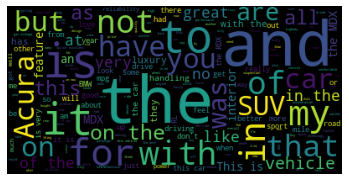

In [ ]:
# It is essential to get some insight into our data before starting ML
# A Wordcloud will allow us to see which words are most recurrent
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# Join all the non-stop sentences of reviews
all_reviews = ' '.join(df_s["text"])
# Get our lemmetied words
words = df_s["lemm"]

# Create our wordcloud with stopwords and non-stop sentences
work_cloud = WordCloud(stopwords=words).generate(all_reviews)
plt.imshow(work_cloud)
plt.axis('off')
plt.show()

There are clearly too many stop words. Stops words are words that help a sentance structure. i.e. 'the', 'to', 'is', etc. We must remove these in order to create a model.

Hence, we must remove Stopwords, Punctuation, and Numbers

In [ ]:
# From Tutorial 7 - Text Mining

from sklearn import decomposition
from scipy import linalg
from sklearn.feature_extraction import _stop_words
import re,string

stopwords = nltk.corpus.stopwords.words('english')

#This function converts our text into lowercase, & removes punctuation/stopwords, and numbers
def clean_text(text):
  text = text.lower()
  # remove numbers
  text = re.sub(r'\d+', '', text)
  # remove words that are size of less than 3
  text = ' '.join([word for word in text.split() if not len(word) < 4 ])
  # remove stopwords
  text = ' '.join([word for word in text.split() if word not in stopwords])
  # remove punctuation
  text = ''.join([word for word in text if word not in string.punctuation])
  text = text.lower()
  return text

In [ ]:
df_s['non_stop'] = df_s['text'].apply(lambda x: clean_text(str(x.strip())))
df_s['lemm'] = df_s['non_stop'].apply(lambda x: lemmatizing(x))

Let's see an updated wordcloud with removed stopwords

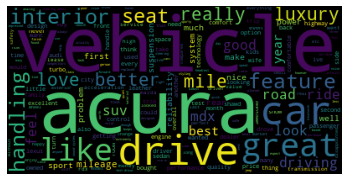

In [ ]:
# It is essential to get some insight into our data before starting ML
# A Wordcloud will allow us to see which words are most recurrent
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# Join all the non-stop sentences of reviews
all_reviews = ' '.join(df_s["non_stop"])
# Get our lemmetied words
words = df_s['lemm']

# Create our wordcloud with stopwords and non-stop sentences
work_cloud = WordCloud(stopwords=words).generate(all_reviews)
plt.imshow(work_cloud)
plt.axis('off')
plt.show()

Much Better! ✅


---



Creating TF-IDF vectors, bigrams, trigrams, and quadgrams. Each concept is explained in the report

In [ ]:
# Creating the TF-IDF vector 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(analyzer='word',stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(df_s['non_stop'])
tfidf_features = vectorizer_tfidf.get_feature_names()
    
# Creating the bigram, trigram, and quadgram vectors
from sklearn.feature_extraction.text import CountVectorizer

vector_bigram = CountVectorizer(stop_words=stopwords, ngram_range=(2,2))
bigrams = vector_bigram.fit_transform(df_s['lemm'])
bigram_features = vector_bigram.get_feature_names()

vector_trigram = CountVectorizer(stop_words=stopwords, ngram_range=(3,3))
trigrams = vector_trigram.fit_transform(df_s['lemm'])
trigram_features = vector_trigram.get_feature_names()

vector_quadgram = CountVectorizer(stop_words=stopwords, ngram_range=(4,4))
quadgrams = vector_quadgram.fit_transform(df_s['lemm'])
quadgram_features = vector_quadgram.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Uncomment one of the below to see the features for each

# for i, feature in enumerate(tfidf_features):
#     print(i, feature)
# for i, feature in enumerate(bigram_features):
#     print(i, feature)
# for i, feature in enumerate(trigram_features):
#     print(i, feature)
# for i, feature in enumerate(quadgram_features):
#     print(i, feature)

In [ ]:
print("The shape of the TD-IDF vector matrix is: ", vectors_tfidf.shape)
print("The shape of the Bigram Vector is: ", bigrams.shape)
print("The shape of the Trigram Vector is: ", trigrams.shape)
print("The shape of the Quadgram Vector is: ", quadgrams.shape)

The shape of the TD-IDF vector matrix is:  (84, 1331)
The shape of the Bigram Vector is:  (84, 3351)
The shape of the Trigram Vector is:  (84, 3443)
The shape of the Quadgram Vector is:  (84, 3367)


Wordcloud for TFIDF

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


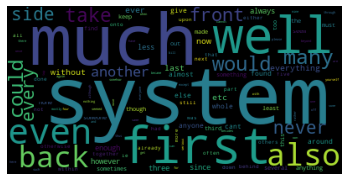

In [ ]:
# Wordcloud for the features for the TF-IDF vectorizer
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

all_reviews = ' '.join(df_s["non_stop"])
features = vectorizer_tfidf.get_feature_names()

work_cloud = WordCloud(stopwords=features).generate(all_reviews)
plt.imshow(work_cloud)
plt.axis('off')
plt.show()

Creating frequencies of the top bigrams, trigrams, and quadgrams may be able to provide some insight

In [ ]:
bigram_df = pd.DataFrame(bigrams.toarray(), columns=bigram_features)
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['Bigram', 'Frequency']
bigram_frequency = bigram_frequency.sort_values(by='Frequency', ascending = False)

trigram_df = pd.DataFrame(trigrams.toarray(), columns=trigram_features)
trigram_frequency = pd.DataFrame(trigram_df.sum(axis=0)).reset_index()
trigram_frequency.columns = ['trigram', 'Frequency']
trigram_frequency = trigram_frequency.sort_values(by='Frequency', ascending = False)

quadgram_df = pd.DataFrame(quadgrams.toarray(), columns=quadgram_features)
quadgram_frequency = pd.DataFrame(quadgram_df.sum(axis=0)).reset_index()
quadgram_frequency.columns = ['quadgram', 'Frequency']
quadgram_frequency = quadgram_frequency.sort_values(by='Frequency', ascending = False)

trigram_frequency

,trigram,Frequency
372,build quality excellent,2
77,adjustable passenger seat,2
3010,test drove audi,2
1723,look forward long,2
2851,steering wheel system,2
...,...,...
1152,found mdx feature,1
1153,found perfect family,1
1154,four found exterior,1
1155,fourth acura last,1


Build quality seems to be excellent, and there's effortless acceleration! **However, this information is still not enough to make conclusions.** 

### Creating the Multinomial Logistic Regression Model

A **multinomial logistic regression** model classified multiple classes to a logistic regression model. A **logistic regression** model takes an input from [-INF, +INF] and outputs as True or False (0 or 1) The mathematic equation is: 

$$ \sigma (t)= \frac{1}{1+e^{-t}}$$

For the model, the X will be either a vectorized TFIDF Matrix, Bigram, Trigram, or Quadgram. 

Y will be the classification of the review. This classification is in the list of 

["Impressed", "Frustrated", "Annoying", "Pleasant", "Terrible", "Happy", "Disappointed", "Enjoy", "Satisfied"]

In [ ]:
X = vectorizer_tfidf.fit_transform(df_s['non_stop'])
X_bigram = bigram_df
X_trigram = trigram_df
X_quadgram = quadgram_df
y = df_s.Classification

Creating the model with an import from Sklearn, with multi_class set to 'multinomial' for each model

In [ ]:
from sklearn.linear_model import LogisticRegression

sentiment_model_tf_idf = LogisticRegression(multi_class='multinomial')
sentiment_model_tf_idf.fit(X, y)

sentiment_model_bigram = LogisticRegression(multi_class='multinomial')
sentiment_model_bigram.fit(X_bigram, y)

sentiment_model_trigram = LogisticRegression(multi_class='multinomial')
sentiment_model_trigram.fit(X_trigram, y)

sentiment_model_quadgram = LogisticRegression(multi_class='multinomial')
sentiment_model_quadgram.fit(X_quadgram, y)

LogisticRegression(multi_class='multinomial')

To visualize the models, a module named eli5 will be used for assessing the weights of features for the classification

In [ ]:
# If ran for the first time, please uncomment the line below
!pip install eli5
import eli5

     |████████████████████████████████| 106 kB 5.3 MB/s 


In [ ]:
# show_weight from eli5 will display all the coefficients that have a strong or
# weak relation for the TFIDF 
from eli5 import show_weights
show_weights(sentiment_model_tf_idf, 
              feature_names= list(tfidf_features),
              top=(30,10))

In [ ]:
# to see the weights for the trigram/quadgram, replace the model name and features in the arugments below
show_weights(sentiment_model_trigram, 
              feature_names= list(trigram_features),
              top=(30,10))

Results will be discussed in the report

### Calulating the accuracy of the model

In [ ]:
# From Tutorial 2.2 - Logistic Regression
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,y)
X_train_bigram, X_test_bigram, Y_train_bigram, Y_test_bigram = train_test_split(X_bigram,y)
X_train_trigram, X_test_trigram, Y_train_trigram, Y_test_trigram = train_test_split(X_trigram,y)
X_train_quadgram, X_test_quadgram, Y_train_quadgram, Y_test_quadgram = train_test_split(X_quadgram,y)

# Make a new log_model
model_tf_idf = LogisticRegression(multi_class='multinomial')
model_bigram = LogisticRegression(multi_class='multinomial')
model_trigram = LogisticRegression(multi_class="multinomial")
model_quadgram = LogisticRegression(multi_class="multinomial")

# Now fit the new model
model_tf_idf.fit(X_train,Y_train)
model_bigram.fit(X_train_bigram,Y_train_bigram)
model_trigram.fit(X_train_trigram,Y_train_trigram)
model_quadgram.fit(X_train_quadgram, Y_train_quadgram)

LogisticRegression(multi_class='multinomial')

In [ ]:
# From Tutorial 2.2 - Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Predict the classes of the testing data set
class_predict = model_tf_idf.predict(X_test)
class_predict_1 = model_bigram.predict(X_test_bigram)
class_predict_2 = model_trigram.predict(X_test_trigram)
class_predict_3 = model_quadgram.predict(X_test_quadgram)

# Compare the predicted classes to the actual test classes
accuracy = metrics.accuracy_score(Y_test,class_predict)
accuracy2 = metrics.accuracy_score(Y_test_bigram,class_predict_1)
accuracy3 = metrics.accuracy_score(Y_test_trigram,class_predict_2)
accuracy4 = metrics.accuracy_score(Y_test_quadgram, class_predict_3)

print("The accuracy of the TFIDF model is:", accuracy)
print("The accuracy of the Bigram model is:", accuracy2)
print("The accuracy of the Trigram model is:", accuracy3)
print("The accuracy of the Trigram model is:", accuracy4)

The accuracy of the TFIDF model is: 0.3333333333333333
The accuracy of the Bigram model is: 0.42857142857142855
The accuracy of the Trigram model is: 0.19047619047619047
The accuracy of the Trigram model is: 0.2857142857142857


<a name="part_3"></a>
# Part 3: Unsupervised Learning

Unsupervised learning is essentially letting the machine learn by itself. Clustering is done for unsupervised learning as it is useful to study different types of automobiles consumers such as those who prefer a sedan, suv, sports car, truck, and more. 

There are only 9 explanatory variables for this model since other numeric variables are not consistent or relevant. Although there are 9 variables for clustering, this model will still be accurate. The reason for this is that only two variables are being used at once for a clustering model. Clustering is done for this project with the use of only numeric variables such that a cluster of automotive consumers can be generated with the use of different variables.



## Data Initialization/Visualization

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [ ]:
#set up the dataset - extract columns which are needed for clustering and make new dataset
df_new = df[["EPA Fuel Economy (city)", "EPA Fuel Economy (highway (mpg))","Price", "Number of Seats", "Length (inches)", "Width, without mirrors (inches)", "Height (inches)",  "Fuel Capacity Gas Tank Size","CO2 Emissions", "Trunk Space (cubic feet)"]]
#new dataset
df_new

,EPA Fuel Economy (city),EPA Fuel Economy (highway (mpg)),Price,Number of Seats,Length (inches),"Width, without mirrors (inches)",Height (inches),Fuel Capacity Gas Tank Size,CO2 Emissions,Trunk Space (cubic feet)
0,28.0,30.79,34245.0,2,55.60,59.4,60.2,105.10,200.00,79.81115
1,23.0,30.79,55945.0,5,196.20,113.8,198.4,78.47,174.00,38.10000
2,21.0,30.79,171495.0,2,76.30,47.8,65.5,78.47,327.60,4.40000
3,22.0,28.00,45995.0,5,186.70,108.3,187.4,78.47,232.00,38.00000
4,20.0,29.00,55925.0,5,198.10,74.4,57.7,18.50,186.00,14.90000
...,...,...,...,...,...,...,...,...,...,...
341,22.0,29.00,57295.0,6,60.70,65.0,64.7,115.80,25.00,78.30000
342,23.0,32.00,41445.0,5,174.20,73.7,65.3,14.20,6.80,56.30000
343,22.8,26.60,56395.0,5,107.06,29.7,5.0,63.60,174.20,34.00000
344,23.0,30.00,49895.0,5,185.40,74.9,65.3,18.80,6.80,56.30000


## K-mean clustering

Our clustering model will have four clusters. These clusters will be: 


1.   Family Car
2.   Single Car Enthusiast (Sports)
3.   Construction Vehicle
4.   City Car (compact)



Initializing the KMeans model

In [ ]:
#Tutorial 5 - Clustering
from sklearn.cluster import KMeans

# initialize a K-Means clustering object with:
# 4 clusters
# random state = 7 (to get same results everytime, since K-Means is a randomized algorithm)
clustering = KMeans(n_clusters=4, random_state=7)

#fit the model to the dataset
clustering.fit(df_new)

KMeans(n_clusters=4, random_state=7)

### Plots for visualizing explanatory variables

The results will be discussed in the Project Report

The cluster displyed in the graph below follow the following colors

🔵 - City Driver

🟣 - Family Car

🟠 - Sports Car (Car enthusiast)

🟢 - Construction Vehicles


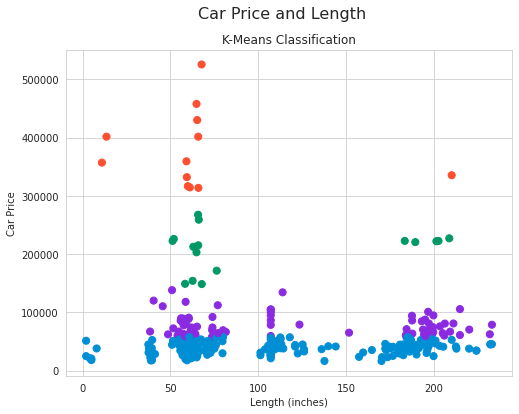

In [ ]:
# plot a scatter plot that has the resulting clusters of K-Means
# have car length (inches) as the x-axis and car price for the y-axis
fig, ax2 = plt.subplots(figsize=(8, 6), sharex=True, sharey=True)

fig.suptitle("Car Price and Length", fontsize=16)

# make a color theme that has 4 colors for clustering 4 groups
color_theme = np.array(['#008fd5','#fc4f30','#009966','#8A2BE2'])
# Blue = #008fd5
# Red = #fc4f30
# Green Haze = #009966
# BlueViolet = #8A2BE2

ax2.scatter(x=df_new['Length (inches)'],
            y=df_new['Price'],
            c=color_theme[clustering.labels_],
            s=50)
ax2.set_xlabel('Length (inches)')
ax2.set_ylabel('Car Price')
ax2.set_title('K-Means Classification')

ax2

**Clustering** with Price and Length looks good! 

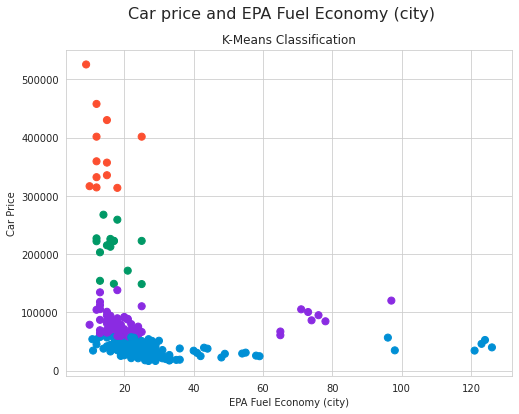

In [ ]:
# plot a scatter plot that has the resulting clusters of K-Means
# have EPA Fuel Economy (city) as the x-axis and car price for the y-axis

fig, ax2 = plt.subplots(figsize=(8, 6), sharex=True, sharey=True)

fig.suptitle("Car price and EPA Fuel Economy (city)", fontsize=16)

# make a color theme that has 4 colors for clustering 4 groups
color_theme = np.array(['#008fd5','#fc4f30','#009966','#8A2BE2'])

ax2.scatter(x=df_new['EPA Fuel Economy (city)'],
            y=df_new['Price'],
            c=color_theme[clustering.labels_],
            s=50)
ax2.set_xlabel('EPA Fuel Economy (city)')
ax2.set_ylabel('Car Price')
ax2.set_title('K-Means Classification')

plt.show()

CLustering with Price and EPA Fuel Economy (city) looks good!

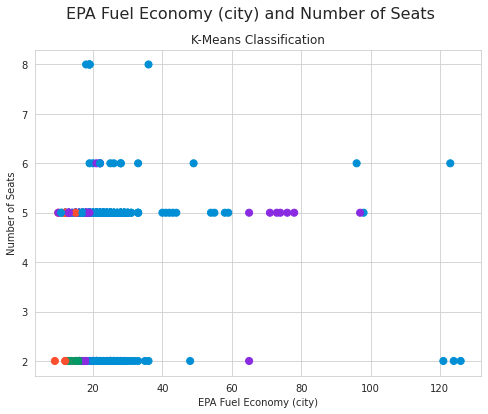

In [ ]:
# plot a scatter plot that has the resulting clusters of K-Means
# have EPA Fuel Economy (city) as the x-axis and Number of Seats for the y-axis

fig, ax2 = plt.subplots(figsize=(8, 6), sharex=True, sharey=True)

fig.suptitle("EPA Fuel Economy (city) and Number of Seats", fontsize=16)

# make a color theme that has 4 colors for clustering 4 groups
color_theme = np.array(['#008fd5','#fc4f30','#009966','#8A2BE2'])

ax2.scatter(x=df_new['EPA Fuel Economy (city)'],
            y=df_new['Number of Seats'],
            c=color_theme[clustering.labels_],
            s=50)
ax2.set_xlabel('EPA Fuel Economy (city)')
ax2.set_ylabel('Number of Seats')
ax2.set_title('K-Means Classification')

fig.show()

CLustering with Number of seats and EPA Fuel Economy (city) doesn't look good.

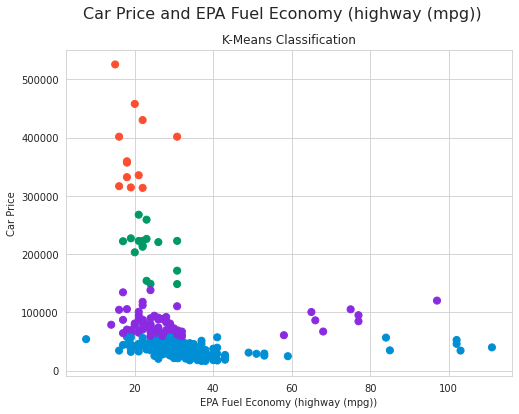

In [ ]:
# plot a scatter plot that has the resulting clusters of K-Means
# have EPA Fuel Economy (highway (mpg)) as the x-axis and Car price for the y-axis

fig, ax2 = plt.subplots(figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle("Car Price and EPA Fuel Economy (highway (mpg))", fontsize=16)

# make a color theme that has 4 colors for clustering 4 groups
color_theme = np.array(['#008fd5','#fc4f30','#009966','#8A2BE2'])

ax2.scatter(x=df_new['EPA Fuel Economy (highway (mpg))'],
            y=df_new['Price'],
            c=color_theme[clustering.labels_],
            s=50)
ax2.set_xlabel('EPA Fuel Economy (highway (mpg))')
ax2.set_ylabel('Car Price')
ax2.set_title('K-Means Classification')

plt.show()

CLustering with price and EPA Fuel Economy (highway) looks good!

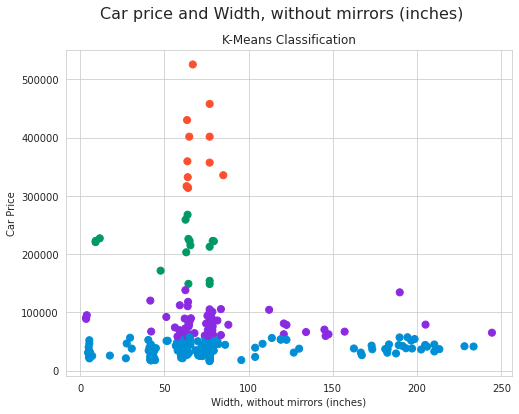

In [ ]:
# plot a scatter plot that has the resulting clusters of K-Means
# have Width, without mirrors (inches) as the x-axis and car price for the y-axis

fig, ax2 = plt.subplots(figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle("Car price and Width, without mirrors (inches)", fontsize=16)

# make a color theme that has 4 colors for clustering 4 groups
color_theme = np.array(['#008fd5','#fc4f30','#009966','#8A2BE2'])

ax2.scatter(x=df_new['Width, without mirrors (inches)'],
            y=df_new['Price'],
            c=color_theme[clustering.labels_],
            s=50)
ax2.set_xlabel('Width, without mirrors (inches)')
ax2.set_ylabel('Car Price')
ax2.set_title('K-Means Classification')

plt.show()

CLustering with price and width looks good!

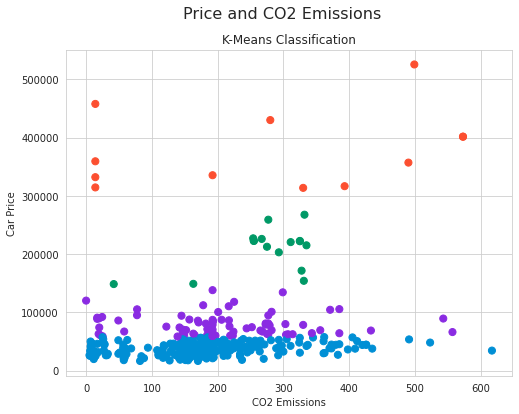

In [ ]:
# plot a scatter plot that has the resulting clusters of K-Means
# have CO2 Emissions as the x-axis and car price for the y-axis

fig, ax2 = plt.subplots(figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle("Price and CO2 Emissions", fontsize=16)

# make a color theme that has 4 colors for clustering 4 groups
color_theme = np.array(['#008fd5','#fc4f30','#009966','#8A2BE2'])

ax2.scatter(x=df_new['CO2 Emissions'],
            y=df_new['Price'],
            c=color_theme[clustering.labels_],
            s=50)
ax2.set_xlabel('CO2 Emissions')
ax2.set_ylabel('Car Price')
ax2.set_title('K-Means Classification')

plt.show()

CLustering with price and C02 emissions looks good!

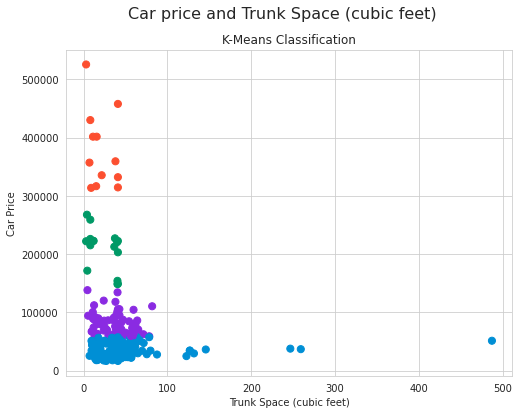

In [ ]:
# plot a scatter plot that has the resulting clusters of K-Means
# have Trunk Space (cubic feet) as the x-axis and Price for the y-axis

fig, ax2 = plt.subplots(figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle("Car price and Trunk Space (cubic feet)", fontsize=16)

# make a color theme that has 4 colors for clustering 4 groups
color_theme = np.array(['#008fd5','#fc4f30','#009966','#8A2BE2'])

ax2.scatter(x=df_new['Trunk Space (cubic feet)'],
            y=df_new['Price'],
            c=color_theme[clustering.labels_],
            s=50)
ax2.set_xlabel('Trunk Space (cubic feet)')
ax2.set_ylabel('Car Price')
ax2.set_title('K-Means Classification')

plt.show()

Clustering with price and trunk space looks good!

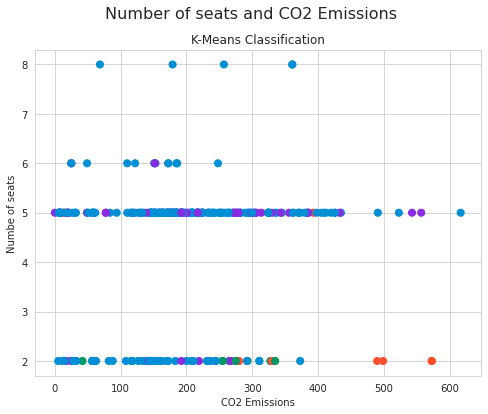

In [ ]:
# plot a scatter plot that has the resulting clusters of K-Means
# have CO2 Emissions as the x-axis and number of seats for the y-axis

fig, ax2 = plt.subplots(figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle("Number of seats and CO2 Emissions", fontsize=16)

# make a color theme that has 4 colors for clustering 4 groups
color_theme = np.array(['#008fd5','#fc4f30','#009966','#8A2BE2'])

ax2.scatter(x=df_new['CO2 Emissions'],
            y=df_new['Number of Seats'],
            c=color_theme[clustering.labels_],
            s=50)
ax2.set_xlabel('CO2 Emissions')
ax2.set_ylabel('Numbe of seats')
ax2.set_title('K-Means Classification')

plt.show()

CLustering with number of seats and CO2 emissions doesn't looks good.

### Evaluation of the K Means Clustering model

Use a Python package, `kneed`, to identify the elbow point programmatically.

In [ ]:
!pip install --upgrade kneed

One way to evaluate the model is using the **Elbow method** is a popular way of measuring the optimal number of clusters. 

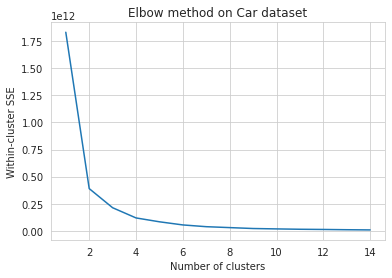

In [ ]:
# Elbow method

# Initlaize a dictionary to have {n_clusters:within_cluster_SSE}
# SSE: Sum of Squares error 
distortations = {}
#determine the max number of cluter
max_n_clusters = 15

# run a for loop to cluster the dataset with 1:max_n_clusters and save their SSE
for k in range(1, max_n_clusters):
  # initialize a K-Means object with n_clusters=k
  kmeans = KMeans(n_clusters=k)
  # fit the model to the scaled data
  kmeans.fit(df_new)
  # record the within-cluster Sum of Squared Error (SSE) for this number of clusters
  distortations[k] = kmeans.inertia_

# plot the elbow grpah (within-cluster SSE vs # clusters)
plt.plot(list(distortations.keys()), 
         list(distortations.values()))
plt.title('Elbow method on Car dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

In [ ]:
from kneed import KneeLocator

# make an instance of KneeLocator and give it:
# - list of # of clusters
# - list of respective SSE
# - curvature of graph ("concave" or "convex")
# - direction of curve ("increasing" or "decreasing")
kl = KneeLocator(
    list(distortations.keys()), 
    list(distortations.values()), 
    curve="convex", 
    direction="decreasing"
)

# the elbow attribute stores the optimal # of clusters
kl.elbow

3

The optimal number of clustering is 3

Concluding Remarks: From the graph above, we can see that the appropriate clusers are either 2 or 3. The number of clusters that we have chosen for this project are 4. Although, 4 is not optimal, we used 4 because it is able to catergorize all the types of car owners